## Auther
Name : Bhagyesh Vikani <br/>
Email : bhagyeshvikani@gmail.com

## Dataset

Name : All India Consumer Price Index (Jan, 2013 - Aug, 2016) <br />
Source : data.gov.in <br />
Format : CSV <br />
Download Link : https://data.gov.in/resources/all-india-consumer-price-index-ruralurban-august-2016/download <br />
Note : Downloaded csv need manual data cleaning

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read data

data = pd.read_csv("All_India_Index_August2016.csv")
data.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [3]:
# List of all different CPI

cpi_index = data.columns.values.tolist()
cpi_index.remove("Sector")
cpi_index.remove("Year")
cpi_index.remove("Month")

In [4]:
# Make data ordered

data["Sector"] = pd.Categorical(data["Sector"], ["Rural", "Urban", "Rural+Urban"])
data["Year"] = pd.Categorical(data["Year"], [2013, 2014, 2015, 2016])
data["Month"] = pd.Categorical(data["Month"], ["January", "February", "March", "April", "May", "June", "July", 
                                               "August", "September", "October", "November", "December"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 30 columns):
Sector                                 132 non-null category
Year                                   132 non-null category
Month                                  132 non-null category
Cereals and products                   132 non-null float64
Meat and fish                          132 non-null float64
Egg                                    132 non-null float64
Milk and products                      132 non-null float64
Oils and fats                          132 non-null float64
Fruits                                 132 non-null float64
Vegetables                             132 non-null float64
Pulses and products                    132 non-null float64
Sugar and Confectionery                132 non-null float64
Spices                                 132 non-null float64
Non-alcoholic beverages                132 non-null float64
Prepared meals, snacks, sweets etc.    132 non-null 

## CPI in different Sectors and Month
* Surprisingly in "Rural" sector CPI is higher than "Urban" sector.
* "August" is a month when CPI is highest in all the sector throughout year

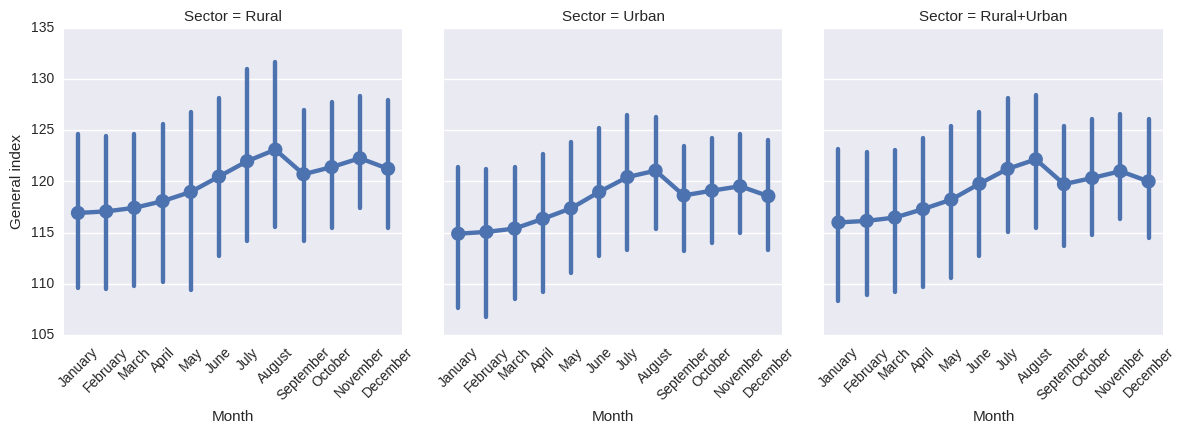

In [5]:
g = sns.factorplot(x = "Month", y = "General index", col = "Sector", data = data)
g.set_xticklabels(rotation = 45)

## CPI in different Sectors and Year
* Increase in CPI is highest in "Rural" sector.
* In 2013, difference between CPI of "Rural" and "Urban" is very small but as years passes this difference became significant.

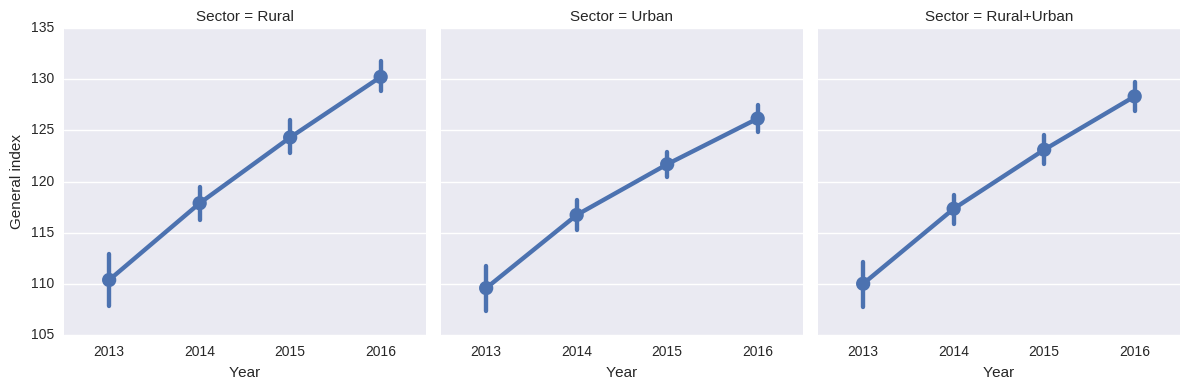

In [6]:
g = sns.factorplot(x = "Year", y = "General index", col = "Sector", data = data)

In [7]:
# Groupby ["Month", "Year"]

cpi = data.groupby(["Month", "Year"], as_index = False).mean()

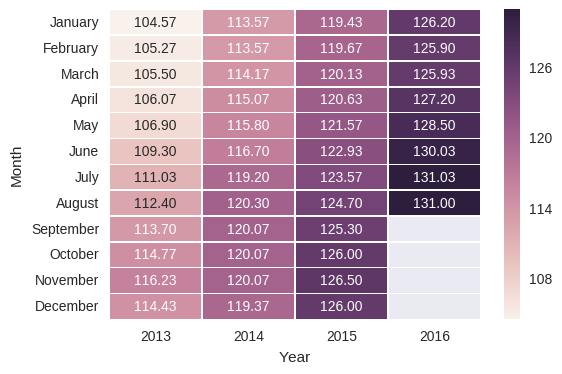

In [8]:
# "General index" respect to change in Month and Year

cpi_general = cpi.pivot("Month", "Year", "General index")

sns.heatmap(cpi_general, annot = True, fmt = "0.2f", linewidths = .25)